## 导入

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, joblib
from sklearn.calibration import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

modelPath = 'model'

def saveModel(df, name):
    joblib.dump(df, os.path.join(modelPath, name))

def loadModel(name):
    return joblib.dump(os.paht.join(modelPath, name))


In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/testA.csv')
submit = pd.read_csv('data/sample_submit.csv')

## 数据浏览

In [36]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [37]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [38]:
train.shape, test.shape

((800000, 47), (200000, 46))

In [39]:
train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'loanAmnt'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'interestRate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'employmentTitle'}>],
       [<Axes: title={'center': 'homeOwnership'}>,
        <Axes: title={'center': 'annualIncome'}>,
        <Axes: title={'center': 'verificationStatus'}>,
        <Axes: title={'center': 'isDefault'}>,
        <Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'postCode'}>],
       [<Axes: title={'center': 'regionCode'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinquency_2years'}>,
        <Axes: title={'center': 'ficoRangeLow'}>,
        <Axes: title={'center': 'ficoRangeHigh'}>,
        <Axes: title={'center': 'openAcc'}>],
       [<Axes: title={'center': 'pubRec'}>,
        <Axes: title={'center': 'pubRecBankruptcies'}>,
        <Axes: title={'center':

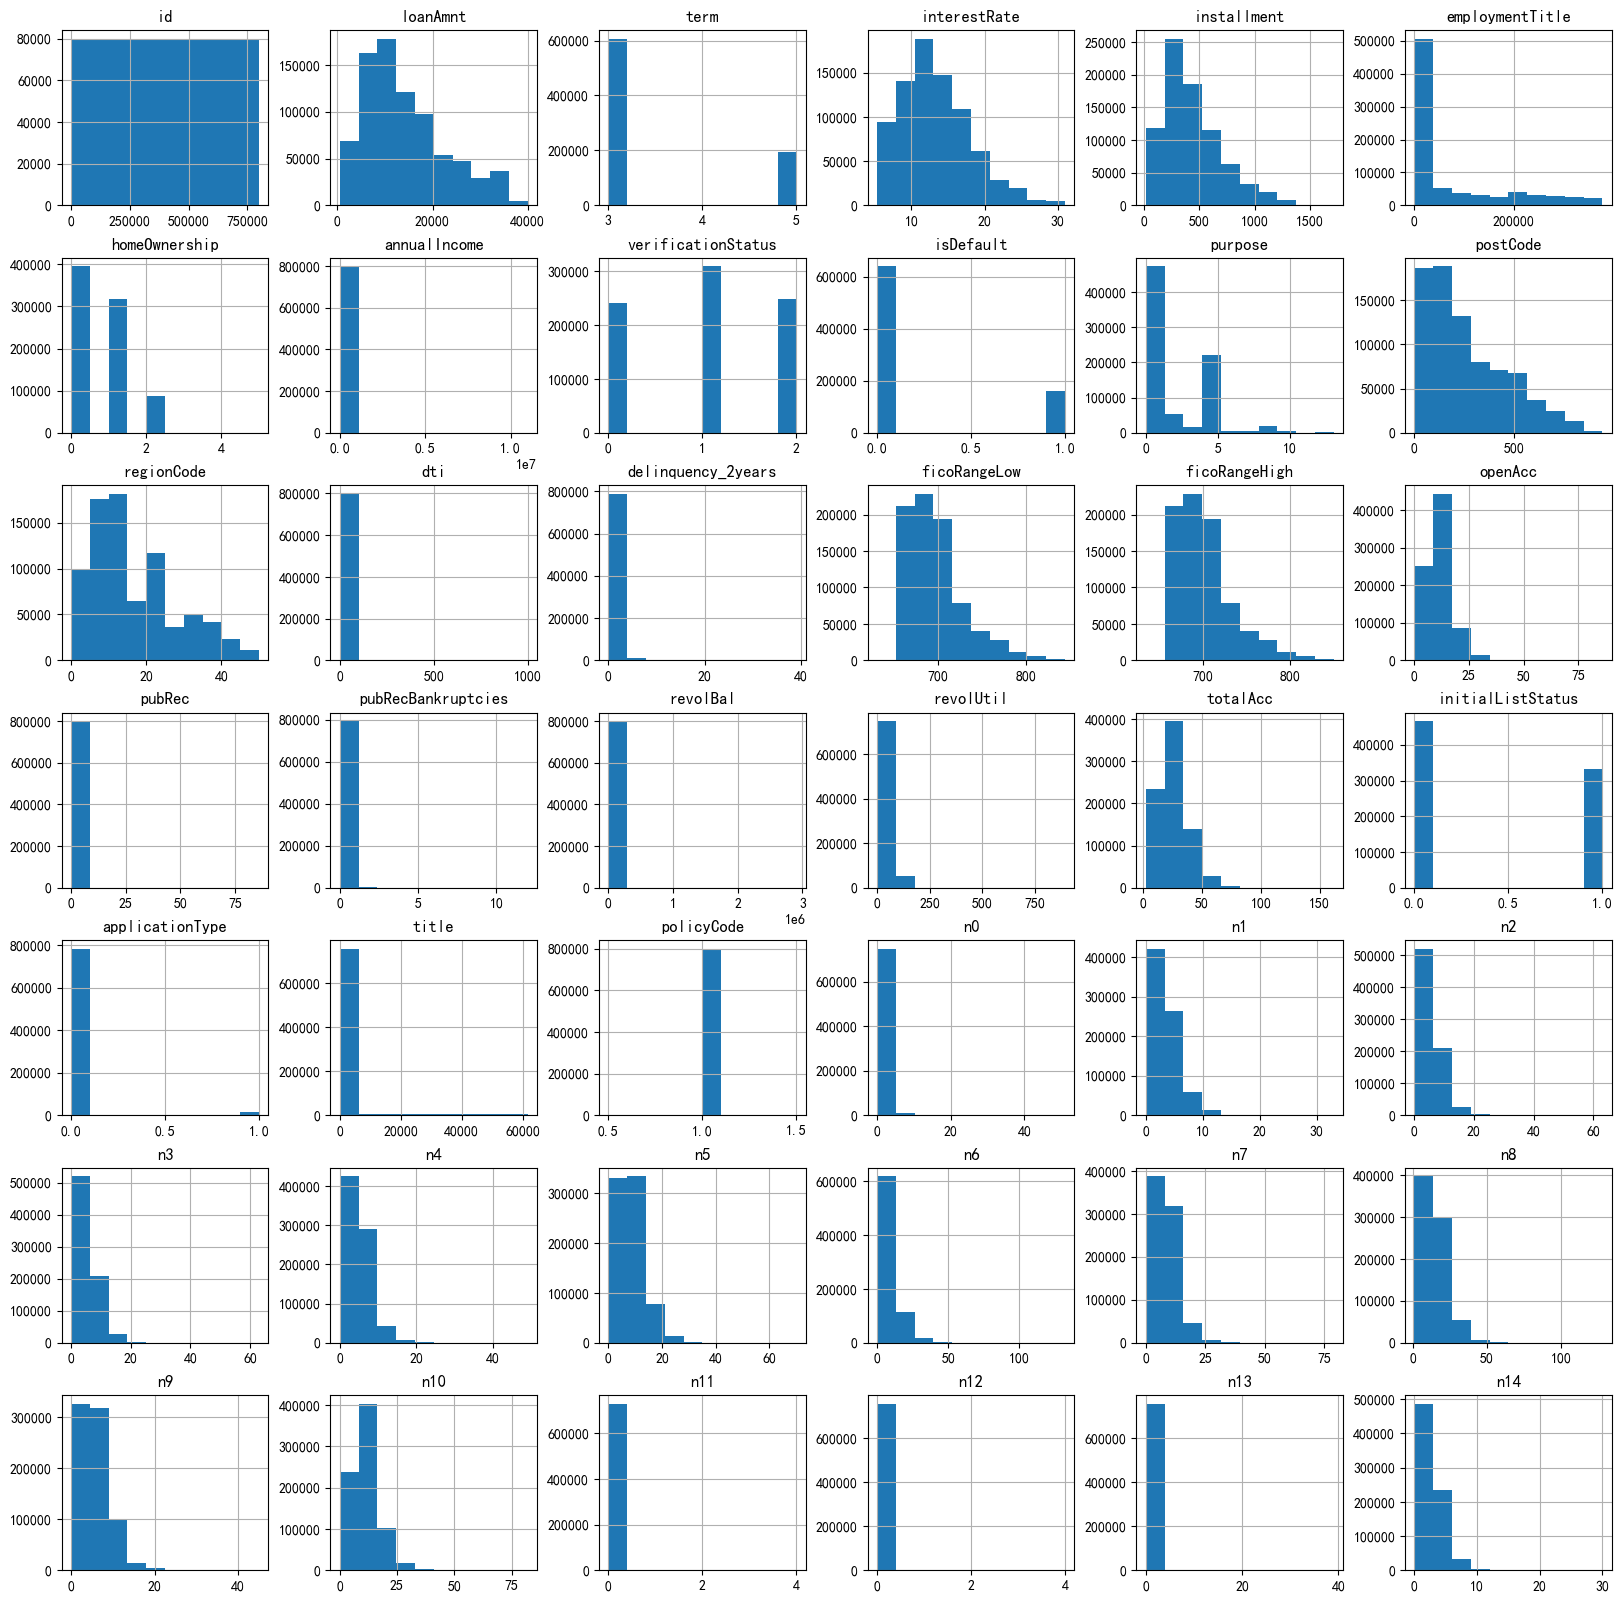

In [40]:
train.hist(figsize=(20,20))

In [41]:
train = train.drop(columns='id')
test = test.drop(columns='id')

查看特征取值种类数

In [42]:
def printUnique(df, col):
    for i in col:
        n = df[i].nunique()
        print(f'{i} 有 {n} 种取值')
        if n < 10:
            print(f'  -- {i} 的取值为: {df[i].unique()}')
        else:
            print(f'  -- {i} 的取值为: {df[i].unique()[:10]}...')
            
printUnique(train, train.columns)

loanAmnt 有 1540 种取值
  -- loanAmnt 的取值为: [35000. 18000. 12000. 11000.  3000.  2050. 11500.  6500.  5600.  5000.]...
term 有 2 种取值
  -- term 的取值为: [5 3]
interestRate 有 641 种取值
  -- interestRate 的取值为: [19.52 18.49 16.99  7.26 12.99  7.99  7.69 14.98 10.99 13.67]...
installment 有 72360 种取值
  -- installment 的取值为: [917.97 461.9  298.17 340.96 101.07 344.65  63.95 398.54 404.27 212.78]...
grade 有 7 种取值
  -- grade 的取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
subGrade 有 35 种取值
  -- subGrade 的取值为: ['E2' 'D2' 'D3' 'A4' 'C2' 'A5' 'C3' 'B4' 'B5' 'E5']...
employmentTitle 有 248683 种取值
  -- employmentTitle 的取值为: [3.20000e+02 2.19843e+05 3.16980e+04 4.68540e+04 5.40000e+01 5.17270e+04
 1.80083e+05 2.14017e+05 1.88000e+02 4.66310e+04]...
employmentLength 有 11 种取值
  -- employmentLength 的取值为: ['2 years' '5 years' '8 years' '10+ years' nan '7 years' '9 years'
 '1 year' '3 years' '< 1 year']...
homeOwnership 有 6 种取值
  -- homeOwnership 的取值为: [2 0 1 5 3 4]
annualIncome 有 44926 种取值
  -- annualIncome 的取值为: [110000.  4600

数值型

非数值型(字符串)

C:\Users\chen\AppData\Local\Temp\ipykernel_18468\3341414862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')


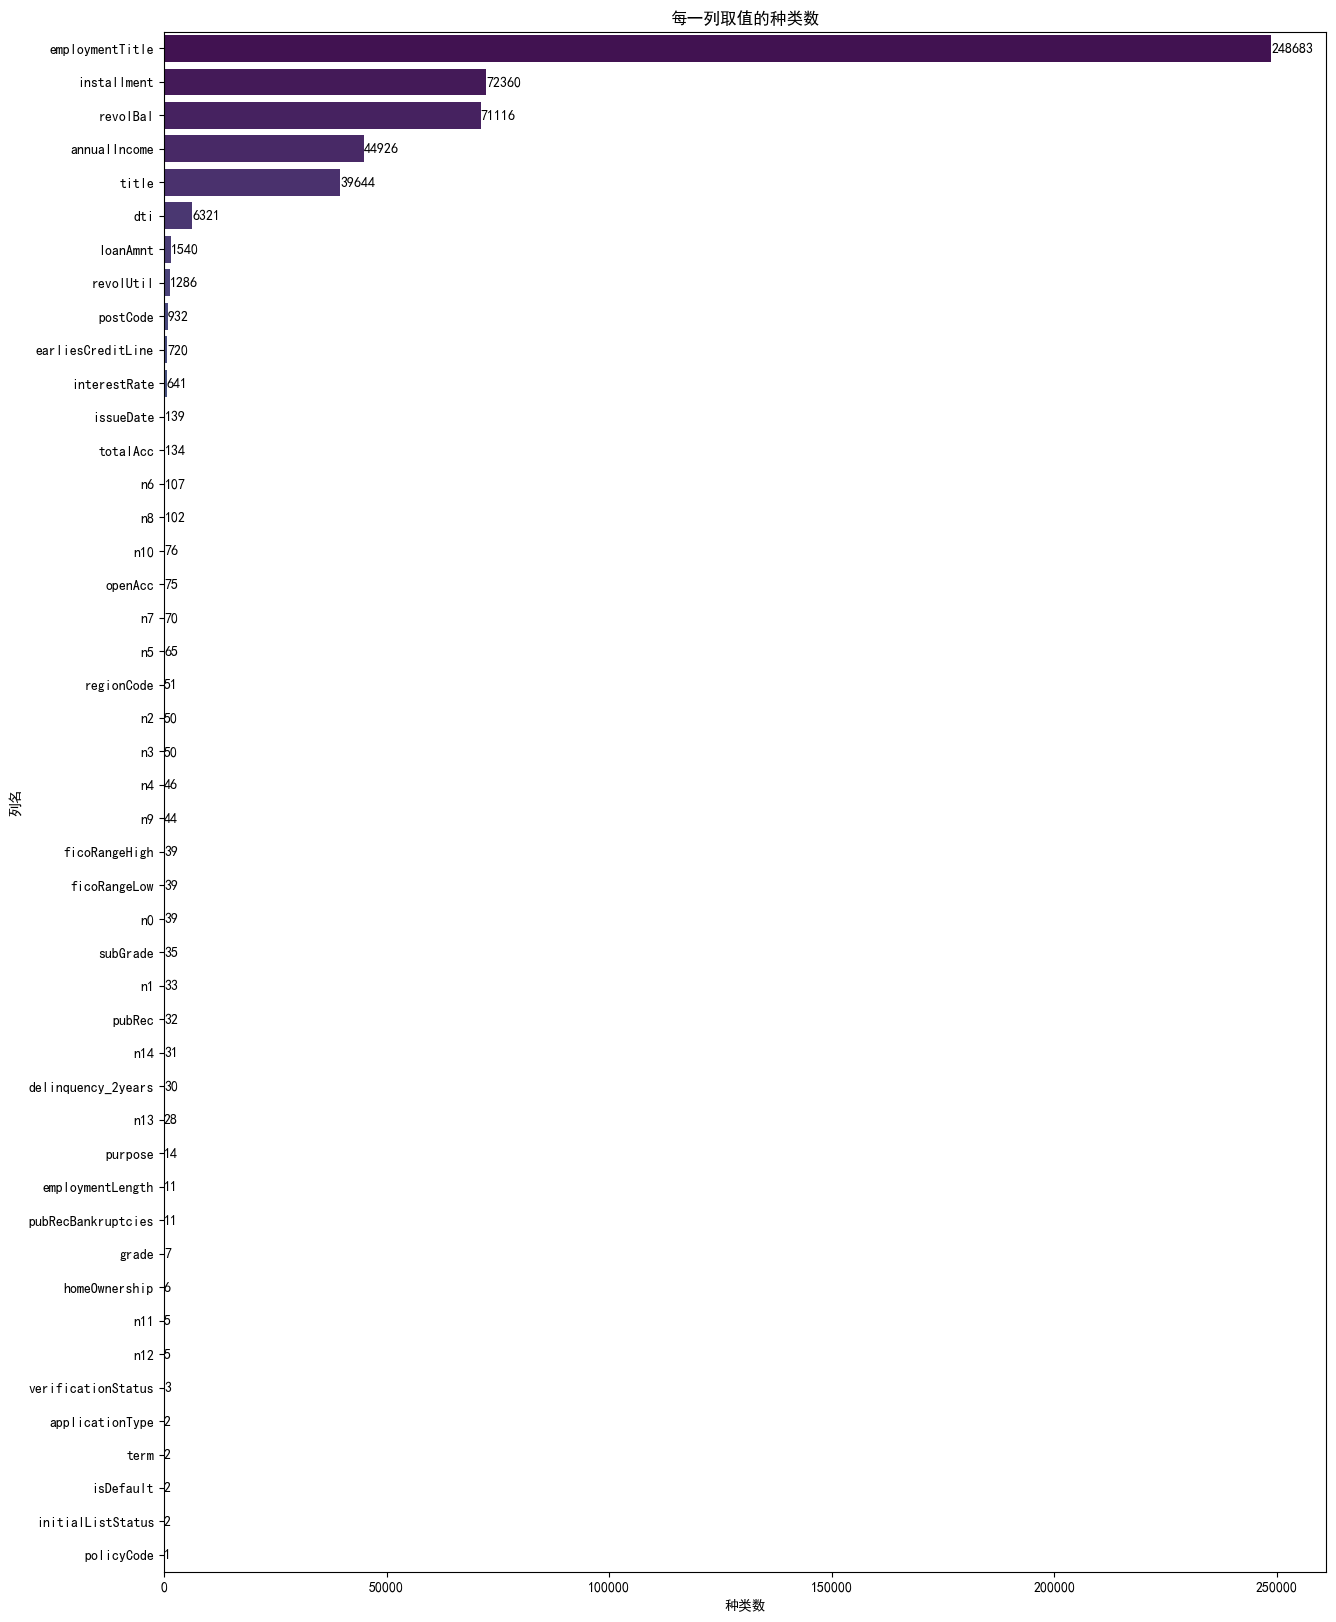

C:\Users\chen\AppData\Local\Temp\ipykernel_18468\3341414862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')


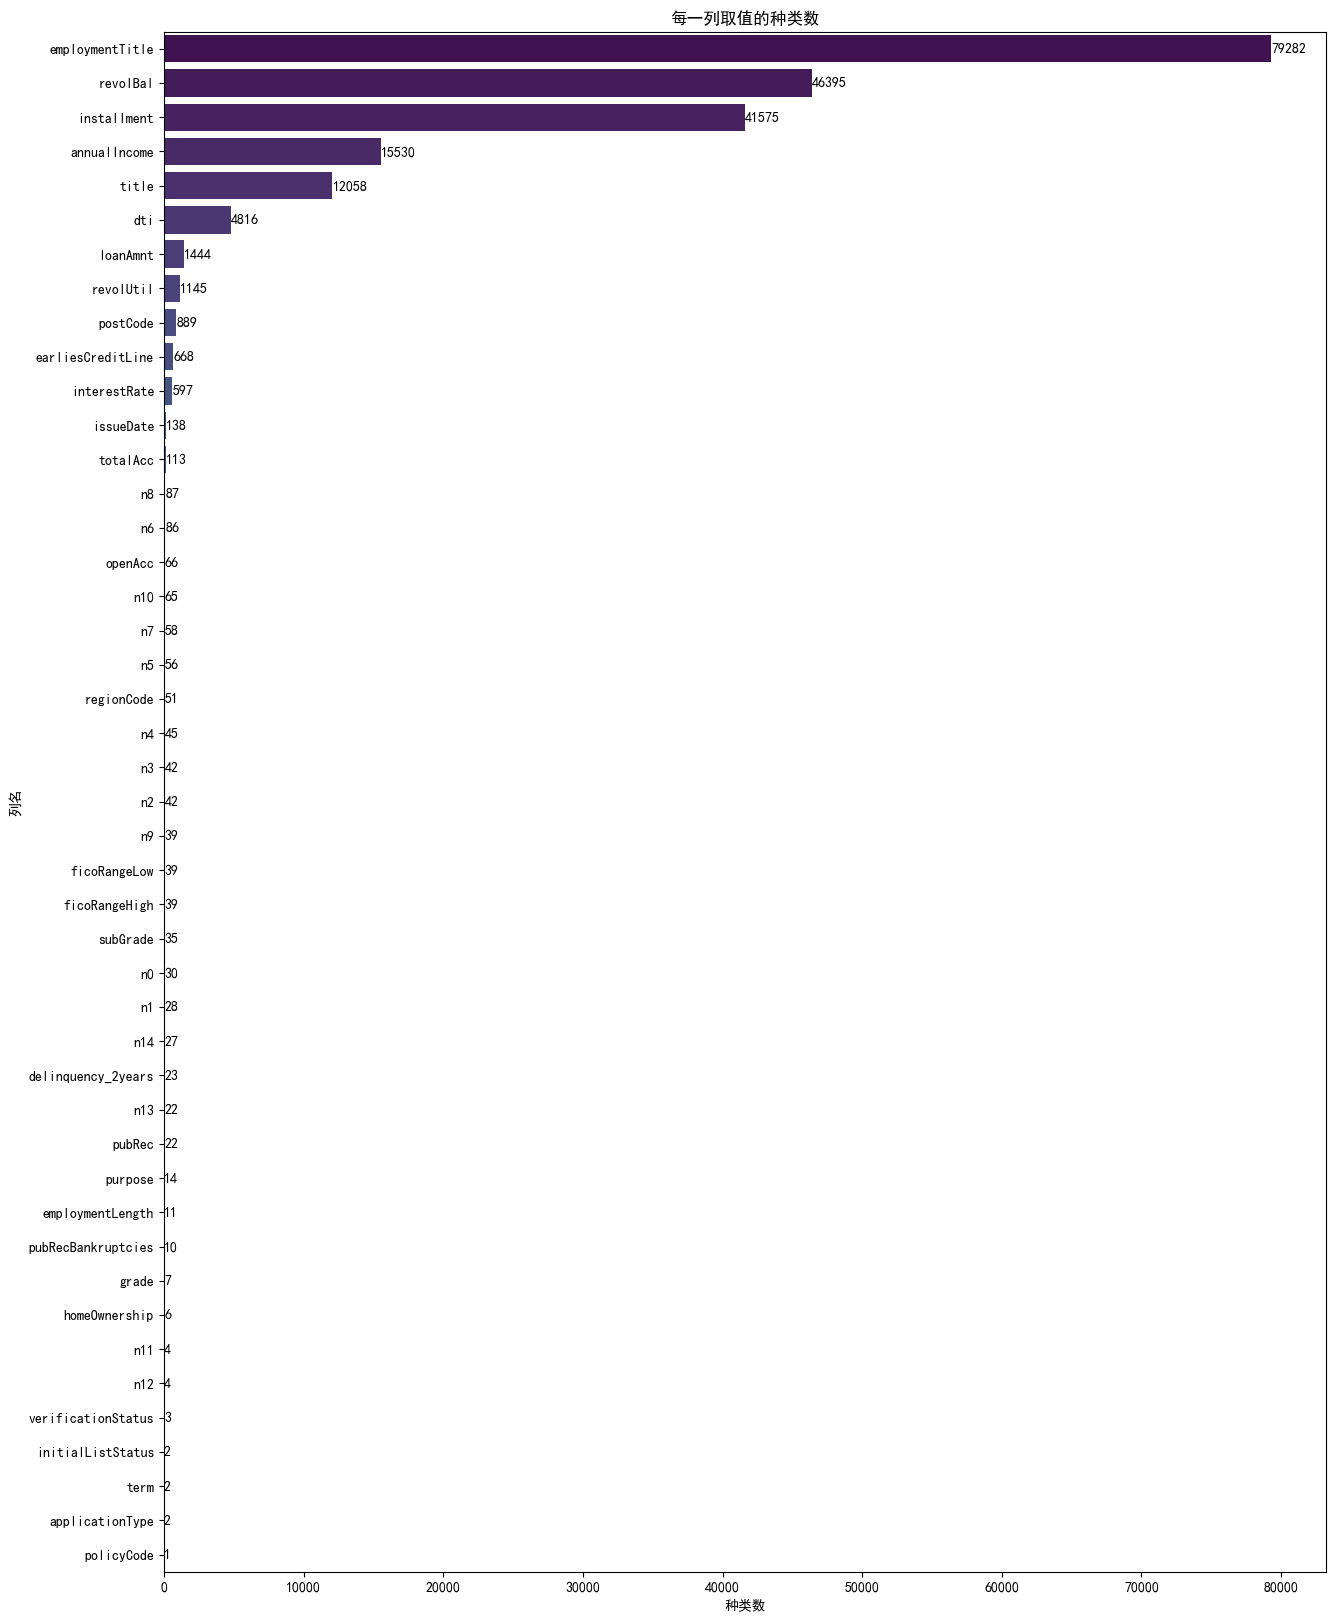

In [43]:
def plotUniqueValues(df):
    unique_counts = df.nunique()
    unique_counts = unique_counts.sort_values(ascending=False)
    
    plt.figure(figsize=(15, 20))
    ax = sns.barplot(x=unique_counts.values, y=unique_counts.index, palette='viridis')
    plt.xlabel('种类数')
    plt.ylabel('列名')
    plt.title('每一列取值的种类数')
    

    for i, v in enumerate(unique_counts.values):
        ax.text(v + 0.1, i, str(v), color='black', va='center')

    plt.show()

plotUniqueValues(train)
plotUniqueValues(test)

查看缺失值

In [44]:
def printMiss(df):
    missing_count = df.isnull().sum()
    
    # 计算每列的缺失率
    missing_rate = missing_count / len(df) * 100
    
    # 创建一个 DataFrame 来存储结果
    missing_data = pd.DataFrame({
        '缺失值数量': missing_count,
        '缺失率 (%)': missing_rate
    })
    
    # 打印结果
    print(missing_data)

# 假设 df 是你的 DataFrame
# df = ...

printMiss(train)
print('-------------------------------------')
printMiss(test)

                    缺失值数量   缺失率 (%)
loanAmnt                0  0.000000
term                    0  0.000000
interestRate            0  0.000000
installment             0  0.000000
grade                   0  0.000000
subGrade                0  0.000000
employmentTitle         1  0.000125
employmentLength    46799  5.849875
homeOwnership           0  0.000000
annualIncome            0  0.000000
verificationStatus      0  0.000000
issueDate               0  0.000000
isDefault               0  0.000000
purpose                 0  0.000000
postCode                1  0.000125
regionCode              0  0.000000
dti                   239  0.029875
delinquency_2years      0  0.000000
ficoRangeLow            0  0.000000
ficoRangeHigh           0  0.000000
openAcc                 0  0.000000
pubRec                  0  0.000000
pubRecBankruptcies    405  0.050625
revolBal                0  0.000000
revolUtil             531  0.066375
totalAcc                0  0.000000
initialListStatus       0  0

有缺失值、偏态  
还有的特征重要程度低

需要进行预处理

## 预处理 - 缺失值填充

连续型 数值 特征 - 平均数  
数值型 离散 特征 - 众数  
非数值型(字符串) - 众数

In [45]:
aver_fill = ['loanAmnt', 'interestRate', 'installment', 'annualIncome', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'revolBal', 'revolUtil', 'n14' ] + [f'n{i}' for i in range(11)]
other_col = train.drop(columns=aver_fill + ['isDefault']).columns.tolist() # isDefault 排除，不参与后面的特征编码


def fill_null(df, col_aver):
    for column in col_aver:
        df[column].fillna(df[column].mean(), inplace=True)

    col_others = df.drop(columns=col_aver).columns
    
    for column in col_others:
        df[column].fillna(df[column].mode()[0], inplace=True)


fill_null(train, aver_fill)
fill_null(test, aver_fill)

In [46]:
train.isnull().any().sum(), test.isnull().any().sum()

(0, 0)

## 特征编码

字符串特征需要进行编码，其中

类别特征 - one hot encode  
日期 - 特殊考虑

issueDate 取月份  
earliesCreditLine 取年份

In [47]:
# 查看字符串值
def print_string_columns(df):
    for column in df.columns:
        if df[column].dtype == 'object': 
            print(f"列 {column} 的具体取值为: {df[column].unique()}")

print_string_columns(train)

列 grade 的具体取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
列 subGrade 的具体取值为: ['E2' 'D2' 'D3' 'A4' 'C2' 'A5' 'C3' 'B4' 'B5' 'E5' 'D4' 'B3' 'B2' 'D1'
 'E1' 'C5' 'C1' 'A2' 'A3' 'B1' 'E3' 'F1' 'C4' 'A1' 'D5' 'F2' 'E4' 'F3'
 'G2' 'F5' 'G3' 'G1' 'F4' 'G4' 'G5']
列 employmentLength 的具体取值为: ['2 years' '5 years' '8 years' '10+ years' '7 years' '9 years' '1 year'
 '3 years' '< 1 year' '4 years' '6 years']
列 issueDate 的具体取值为: ['2014-07-01' '2012-08-01' '2015-10-01' '2015-08-01' '2016-03-01'
 '2017-04-01' '2014-10-01' '2014-01-01' '2016-05-01' '2015-11-01'
 '2013-11-01' '2018-12-01' '2017-05-01' '2016-01-01' '2017-02-01'
 '2014-05-01' '2015-05-01' '2012-12-01' '2013-12-01' '2016-12-01'
 '2015-04-01' '2018-01-01' '2018-04-01' '2013-06-01' '2016-08-01'
 '2012-09-01' '2010-04-01' '2017-01-01' '2015-01-01' '2016-06-01'
 '2017-08-01' '2016-11-01' '2013-07-01' '2014-08-01' '2015-12-01'
 '2017-03-01' '2018-05-01' '2015-09-01' '2014-11-01' '2016-04-01'
 '2014-12-01' '2015-07-01' '2016-07-01' '2011-11-01' '2013-05-01'


In [48]:
def date_encode(df):
    df['issueDate'] = pd.to_datetime(df['issueDate']).dt.year
    df['earliesCreditLine'] = pd.to_datetime(df['earliesCreditLine'], format='%b-%Y').dt.year


date_encode(train)
date_encode(test)

In [49]:
train['issueDate'], train['earliesCreditLine']

(0         2014
 1         2012
 2         2015
 3         2015
 4         2016
           ... 
 799995    2016
 799996    2013
 799997    2015
 799998    2015
 799999    2018
 Name: issueDate, Length: 800000, dtype: int32,
 0         2001
 1         2002
 2         2006
 3         1999
 4         1977
           ... 
 799995    2011
 799996    1989
 799997    2002
 799998    1994
 799999    2002
 Name: earliesCreditLine, Length: 800000, dtype: int32)

In [50]:
encode_col = other_col.remove('issueDate')
encode_col = other_col.remove('earliesCreditLine')

printUnique(train, other_col)

term 有 2 种取值
  -- term 的取值为: [5 3]
grade 有 7 种取值
  -- grade 的取值为: ['E' 'D' 'A' 'C' 'B' 'F' 'G']
subGrade 有 35 种取值
  -- subGrade 的取值为: ['E2' 'D2' 'D3' 'A4' 'C2' 'A5' 'C3' 'B4' 'B5' 'E5']...
employmentTitle 有 248683 种取值
  -- employmentTitle 的取值为: [3.20000e+02 2.19843e+05 3.16980e+04 4.68540e+04 5.40000e+01 5.17270e+04
 1.80083e+05 2.14017e+05 1.88000e+02 4.66310e+04]...
employmentLength 有 11 种取值
  -- employmentLength 的取值为: ['2 years' '5 years' '8 years' '10+ years' '7 years' '9 years' '1 year'
 '3 years' '< 1 year' '4 years']...
homeOwnership 有 6 种取值
  -- homeOwnership 的取值为: [2 0 1 5 3 4]
verificationStatus 有 3 种取值
  -- verificationStatus 的取值为: [2 1 0]
purpose 有 14 种取值
  -- purpose 的取值为: [ 1  0  4 10  9  2  3  7  8  5]...
postCode 有 932 种取值
  -- postCode 的取值为: [137. 156. 337. 148. 301. 512. 517. 100. 792.  59.]...
regionCode 有 51 种取值
  -- regionCode 的取值为: [32 18 14 11 21  4 13  8 49 38]...
delinquency_2years 有 30 种取值
  -- delinquency_2years 的取值为: [ 0.  3.  2.  5.  1. 13.  8.  4.  6. 11.]

['grade', 'subGrade', 'employmentLength'] 三种字符串型数据

subGrade A1~E5 35种组合，**顺序编码**

'grade', ['E' 'D' 'A' 'C' 'B' 'F' 'G'] **one hot encode**

'employmentLength' ['2 years' '5 years' '8 years' '10+ years' '7 years' '9 years' '1 year'] **one hot encode**



In [51]:
label_encoder = LabelEncoder()
train['subGrade'] = label_encoder.fit_transform(train['subGrade'])
test['subGrade'] = label_encoder.fit_transform(test['subGrade'])

In [52]:
train['subGrade']

0         21
1         16
2         17
3          3
4         11
          ..
799995    13
799996     3
799997    12
799998     3
799999     7
Name: subGrade, Length: 800000, dtype: int32

In [53]:
train = pd.get_dummies(train, columns=['grade', 'employmentLength'], prefix=['grade', 'employmentLength'])
test = pd.get_dummies(test, columns=['grade', 'employmentLength'], prefix=['grade', 'employmentLength'])

剩下一些数值型离散特征，根据特征取值的数目决定是否one hot编码

*此处注意我把train test合并在一起，进行onehot编码*

In [54]:
columns_to_encode = [
    'term', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode',
    'initialListStatus', 'applicationType', 'n11', 'n12', 'n13'
]

# 取出isDefault
y_train = train['isDefault']
train = train.drop(columns='isDefault')

# concat
tmp = pd.concat([train, test], axis=0)

# encode
tmp = pd.get_dummies(tmp, columns=columns_to_encode, prefix=columns_to_encode)

# 拆分
train = tmp.iloc[:len(train)]
test = tmp.iloc[len(train):]

正态化

In [55]:
from scipy.stats import skew, skewtest, boxcox

train[aver_fill] = train[aver_fill] + 1 - train[aver_fill].min()
for column in aver_fill:
    # 检查偏态
    skewness = skew(train[column])
    skew_test = skewtest(train[column])
    print(f"Column: {column}, Skewness: {skewness}, p-value: {skew_test.pvalue}")

    # 如果偏态显著（p-value < 0.05），进行正态化处理
    if skew_test.pvalue < 0.05:
        # 对数变换（适用于所有值为正的列）
        if (train[column] > 0).all():
            train[column] = np.log1p(train[column])
            print(f"Column: {column} has been log-transformed.")
        else:
            # Box-Cox 变换（适用于所有值为正的列）
            train[column], _ = boxcox(train[column] + 1)  # 加1以确保所有值为正
            print(f"Column: {column} has been Box-Cox transformed.")

C:\Users\chen\AppData\Local\Temp\ipykernel_18468\3720792871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[aver_fill] = train[aver_fill] + 1 - train[aver_fill].min()
C:\Users\chen\AppData\Local\Temp\ipykernel_18468\3720792871.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = np.log1p(train[column])


Column: loanAmnt, Skewness: 0.7826206555803148, p-value: 0.0
Column: loanAmnt has been log-transformed.
Column: interestRate, Skewness: 0.7123632326789049, p-value: 0.0
Column: interestRate has been log-transformed.
Column: installment, Skewness: 1.006326467526485, p-value: 0.0
Column: installment has been log-transformed.
Column: annualIncome, Skewness: 46.18764447835277, p-value: 0.0
Column: annualIncome has been log-transformed.
Column: dti, Skewness: 27.305351195688182, p-value: 0.0
Column: dti has been log-transformed.
Column: ficoRangeLow, Skewness: 1.2824018747287074, p-value: 0.0
Column: ficoRangeLow has been log-transformed.
Column: ficoRangeHigh, Skewness: 1.2826058354546697, p-value: 0.0
Column: ficoRangeHigh has been log-transformed.
Column: revolBal, Skewness: 15.924650580036646, p-value: 0.0
Column: revolBal has been log-transformed.
Column: revolUtil, Skewness: -0.018065379605270892, p-value: 4.222061657507192e-11
Column: revolUtil has been log-transformed.
Column: n14, 

array([[<Axes: title={'center': 'loanAmnt'}>,
        <Axes: title={'center': 'interestRate'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annualIncome'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'ficoRangeLow'}>,
        <Axes: title={'center': 'ficoRangeHigh'}>,
        <Axes: title={'center': 'revolBal'}>,
        <Axes: title={'center': 'revolUtil'}>,
        <Axes: title={'center': 'n14'}>],
       [<Axes: title={'center': 'n0'}>, <Axes: title={'center': 'n1'}>,
        <Axes: title={'center': 'n2'}>, <Axes: title={'center': 'n3'}>,
        <Axes: title={'center': 'n4'}>],
       [<Axes: title={'center': 'n5'}>, <Axes: title={'center': 'n6'}>,
        <Axes: title={'center': 'n7'}>, <Axes: title={'center': 'n8'}>,
        <Axes: title={'center': 'n9'}>],
       [<Axes: title={'center': 'n10'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

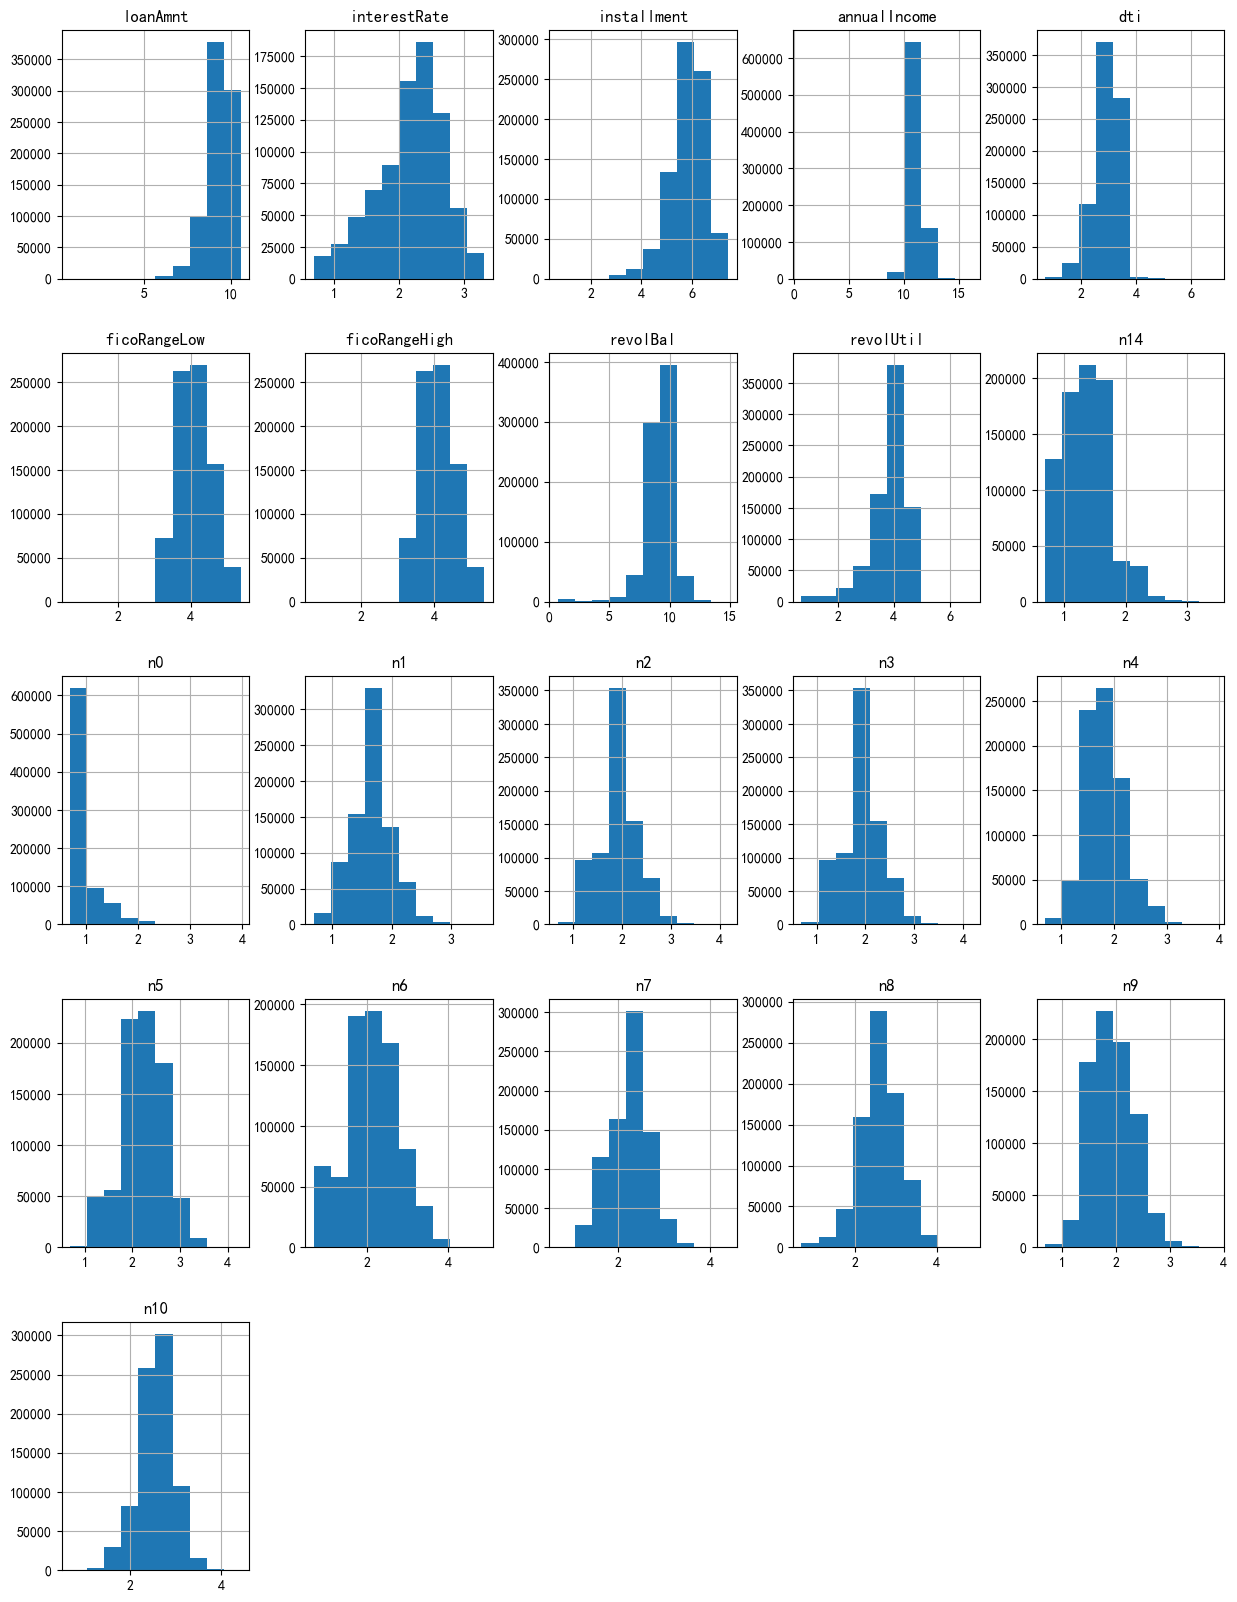

In [56]:
train[aver_fill].hist(figsize=(15, 20))

删除异常值

In [23]:
def remove_outliers(df, column):
    # 计算四分位数
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # 定义上下限
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 过滤掉异常值
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


for column in aver_fill:
    train = remove_outliers(train, column)
    test = remove_outliers(test, column)

输出

In [57]:
train.shape, test.shape

((800000, 170), (200000, 170))

In [58]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [59]:
X_train = train
X_test = test

In [60]:
X_train.shape, X_test.shape, y_train.shape

((800000, 170), (200000, 170), (800000,))

## 模型训练

### 逻辑回归

In [35]:
X_train = tmp

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score


# 创建一个包含标准化和逻辑回归的管道
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, n_jobs=4))

# 定义超参数网格
param = {
    'logisticregression__solver': ['saga'], # 坐标轴下降、牛顿法、随机平均梯度下降
    'logisticregression__penalty': ['l1', 'l2'],  # L2 正则化和弹性网络正则化
    'logisticregression__max_iter': [300],
    'logisticregression__C':[0.5, 0.8]
}

# 使用 AUC 作为评分指标
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# 使用网格搜索调整超参数
grid = GridSearchCV(pipeline, param_grid=param, cv=3, scoring=auc_scorer, verbose=1, n_jobs=4)
# 训练模型
grid.fit(X_train, y_train)

d:\tool\Anconda\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [79]:
grid.best_params_

NameError: name 'grid' is not defined

In [ ]:
# 交叉验证 k = 5
cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring=auc_scorer)

In [31]:
cv_scores, cv_scores.mean()

NameError: name 'cv_scores' is not defined

In [71]:
pipeline.fit(X_train, y_train)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

### XGBoost

In [61]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from scipy.stats import uniform, randint

# 创建 XGBoost 分类器
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 定义超参数分布
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# 使用 AUC 作为评分指标
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# 使用随机网格搜索调整超参数
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=3, scoring=auc_scorer, verbose=1, n_jobs=-1, random_state=42)

# 训练模型
random_search.fit(X_train, y_train)

# 打印最佳参数
print("Best parameters found: ", random_search.best_params_)

# 打印最佳 AUC 分数
print("Best cross-validation AUC: ", random_search.best_score_)

# 使用最佳模型进行预测
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

d:\tool\Anconda\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits


提交

In [73]:
submit['isDefault'] = pipeline.predict(X_test)

In [78]:
submit.to_csv('out1.csv', index=False)

正态化

模型需要调参，网格搜索

模型融合